In [2]:
!pip install yfinance

In [322]:
import warnings
warnings.filterwarnings('ignore')

In [166]:
%matplotlib inline
import yfinance as yf
import datetime
import matplotlib.pyplot as plt


start_sp = datetime.datetime(2021, 10, 22)
end_sp = datetime.datetime(2022, 12, 31)


aapl = yf.download('AAPL',start_sp,end_sp)

[*********************100%***********************]  1 of 1 completed


In [170]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-22,149.690002,150.179993,148.639999,148.690002,147.616577,58883400
2021-10-25,148.679993,149.369995,147.619995,148.639999,147.566925,50720600
2021-10-26,149.330002,150.839996,149.009995,149.320007,148.242050,60893400
2021-10-27,149.360001,149.729996,148.490005,148.850006,147.775436,56094900
2021-10-28,149.820007,153.169998,149.720001,152.570007,151.468567,100077900
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400


# Time series 

In [ ]:
#1. plot price time series

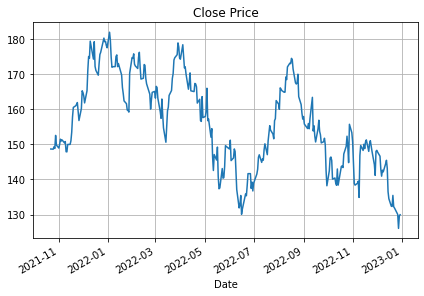

In [171]:
aapl['Close'].plot()
plt.tight_layout()
plt.title('Close Price')
plt.grid()
plt.show()

# Moving averages

In [227]:
#3. Define mathematically the moving average of the price time series with an arbitrary timewindow τ

Moving average keeps updating the average data and find the average change through time. It is a dynamically updated weights. There are several kinds of moving average, such as simple moving average and exponential moving average.

For SMA:  $s_{t-1} = 1/T \sum_{1}^{T} r_{t-k}$

For EWMA: $s_{t-1} = c(\lambda)\sum_{k=1}^{∞} \lambda^k r_{t-k}$

The longer the time, larger the lags. If the plot of the moving average shows an upward trend, then it indicates the data will very likely to move up later. In contrast, a downward trend will show that the data will move down with high possibility.

In [46]:
#4. Compute three moving averages of the price time series, with time-windows τ = 10,20,30

In [52]:
def ma_f(data,window_size):
    i = 0
    ma_list = []
    while i < len(data)-window_size+1:    
        window = data[i:i+window_size]
        window_average = sum(window)/window_size
        ma_list.append(window_average)
        i =i+1
    return ma_list
#print(moving_averages)

In [60]:
w10=ma_f(aapl['Close'],10)
#print(len(ma_f(aapl['Close'],10)))
w20=ma_f(aapl['Close'],20)
w30=ma_f(aapl['Close'],30)

#print(w10)

In [190]:
aapl['ma_10']=aapl['Close'].rolling(window=10).mean()
aapl

,Open,High,Low,Close,Adj Close,Volume,ma_20,ma_30,ma_10
Date,,,,,,,,,
2021-10-22,149.690002,150.179993,148.639999,148.690002,147.616577,58883400,NaN,NaN,NaN
2021-10-25,148.679993,149.369995,147.619995,148.639999,147.566925,50720600,NaN,NaN,NaN
2021-10-26,149.330002,150.839996,149.009995,149.320007,148.242050,60893400,NaN,NaN,NaN
2021-10-27,149.360001,149.729996,148.490005,148.850006,147.775436,56094900,NaN,NaN,NaN
2021-10-28,149.820007,153.169998,149.720001,152.570007,151.468567,100077900,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900,140.6610,143.646999,136.839000
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800,139.9515,142.991332,135.392999
2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400,139.1950,142.249999,133.449999


In [347]:
aapl['ma_10']=aapl['Close'].rolling(window=10).mean()
aapl['ma_20']=aapl['Close'].rolling(window=20).mean()
aapl['ma_30']=aapl['Close'].rolling(window=30).mean()
aapl

,Open,High,Low,Close,Adj Close,Volume,ma_20,ma_30,ma_10
Date,,,,,,,,,
2021-10-22,149.690002,150.179993,148.639999,148.690002,147.616577,58883400,NaN,NaN,NaN
2021-10-25,148.679993,149.369995,147.619995,148.639999,147.566925,50720600,NaN,NaN,NaN
2021-10-26,149.330002,150.839996,149.009995,149.320007,148.242050,60893400,NaN,NaN,NaN
2021-10-27,149.360001,149.729996,148.490005,148.850006,147.775436,56094900,NaN,NaN,NaN
2021-10-28,149.820007,153.169998,149.720001,152.570007,151.468567,100077900,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900,140.6610,143.646999,136.839000
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800,139.9515,142.991332,135.392999
2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400,139.1950,142.249999,133.449999


In [192]:
#5. Plot the moving averages against the price time series

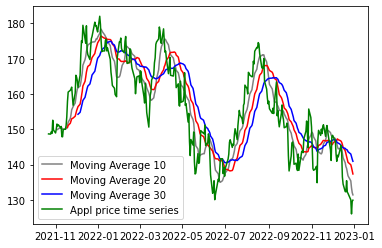

In [195]:
plt.plot(aapl.ma_10,color='grey',label = "Moving Average 10")
plt.plot(aapl.ma_20,color='red',label = "Moving Average 20")
plt.plot(aapl.ma_30,color='blue',label = "Moving Average 30")
plt.plot(aapl['Close'],color='green',label = "Appl price time series")
plt.legend()

In [196]:
#plt.plot(aapl['Close'],aapl.ma_10)

In [197]:
#plt.scatter(aapl['Close'],aapl.ma_10)
#plt.scatter(aapl['Close'],aapl.ma_20)
#plt.scatter(aapl['Close'],aapl.ma_30)

In [ ]:
#6. Compute the linear and log-return of the price time series

$log(R_t)=log(P_t)-log(P_{t-1})$

$R_t=\frac{(P_t-P_{t-1})}{p_{t-1}}$

In [348]:
log_rets= (np.log(aapl.Close) - np.log(aapl.Close.shift(1))).dropna()
print(log_rets)
linear_rets = ((aapl.Close) /aapl.Close.shift(1) -1).dropna()
print(linear_rets)

Date
2021-10-25   -0.000336
2021-10-26    0.004564
2021-10-27   -0.003153
2021-10-28    0.024684
2021-10-29   -0.018322
                ...   
2022-12-23   -0.002802
2022-12-27   -0.013976
2022-12-28   -0.031166
2022-12-29    0.027931
2022-12-30    0.002466
Name: Close, Length: 299, dtype: float64
Date
2021-10-25   -0.000336
2021-10-26    0.004575
2021-10-27   -0.003148
2021-10-28    0.024992
2021-10-29   -0.018156
                ...   
2022-12-23   -0.002798
2022-12-27   -0.013878
2022-12-28   -0.030685
2022-12-29    0.028324
2022-12-30    0.002469
Name: Close, Length: 299, dtype: float64


In [ ]:
#7. Plot the linear return against the log-return time series

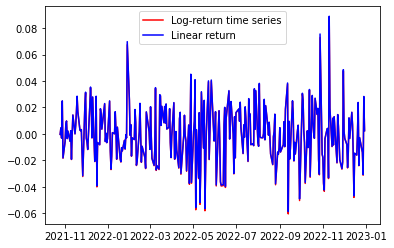

In [200]:
plt.plot(log_rets,color='red',label = "Log-return time series")
plt.plot(linear_rets,color='blue',label = "Linear return")
plt.legend()

In [201]:
#plt.plot(log_rets,linear_rets)

In [202]:
#plt.scatter(log_rets,linear_rets)

In [77]:
#print(linear_rets)
#print(log_rets)

In [86]:
!pip install pandas_datareader

     |████████████████████████████████| 109 kB 6.3 MB/s eta 0:00:01


# Time Series Analysis

In [91]:
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from pandas_datareader import data as pdr

import statsmodels
import statsmodels.api as sm

In [228]:
#8. Define the auto-correlation function (for a stationary time-series)

The mathematical formuala for autocorrelation function $\rho_k =\frac{Cov(e_t+e_{t+k })}{\sigma^2}$, where the time series is stationary. This means that it doesn't depend on time. In time series, we calculate different time steps (lags) to find the correlations between the data points themselves. It is a way to find the correlation with itself.


In [ ]:
#9. Compute the auto-correlation function (ACF) of the price time series

In [212]:
close_aapl = aapl['Close']
acf_aapl = statsmodels.tsa.stattools.acf(close_aapl)

In [213]:
acf_aapl

array([1.        , 0.96078203, 0.92231115, 0.88743308, 0.85563346,
       0.82588951, 0.7901401 , 0.75713222, 0.72314405, 0.69478986,
       0.66498907, 0.64208303, 0.61657133, 0.59364492, 0.56789896,
       0.53966434, 0.51482728, 0.49031151, 0.46810689, 0.44314312,
       0.41798741, 0.39456291, 0.3707772 , 0.3462498 , 0.32195697])

In [ ]:
#The first lag shows strong autocorrelation(1), because it indicates the autocorrelation with $Y_t$.
#As lag becomes larger, the autocorrelation becomes smaller, because $Y_t$ mostly has nothing to do with itself a long time later.


In [214]:
#10. Plot the price ACF

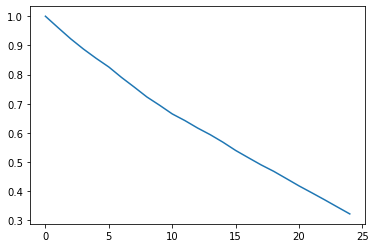

In [215]:
plt.plot(acf_aapl)

In [ ]:
#Two different codes are used to show the ACF and PACF plots. The first one can see the general trend, and the second one shows changes of the lags more clear.
#The ACF plot of closed price time series shows a gradual decay trend.

In [216]:
#11. Compute the partial auto-correlation function (PACF) of the price time series

In [217]:
pacf_aapl = statsmodels.tsa.stattools.pacf(close_aapl)

In [542]:
pacf_aapl

array([ 1.00000000e+00,  9.63995347e-01, -1.11135531e-02,  2.95916168e-02,
        2.47577040e-02,  1.38258854e-02, -1.00221087e-01,  2.13166087e-02,
       -4.02401459e-02,  5.89634750e-02, -4.36439158e-02,  9.91470506e-02,
       -6.10178198e-02,  4.26563239e-02, -7.67253277e-02, -3.26090668e-02,
       -5.69832273e-04,  8.43204206e-03, -6.18226250e-03, -2.57154310e-02,
       -3.03552951e-02,  2.10796638e-02, -4.54695742e-02, -2.45173451e-02,
       -2.04634680e-02])

In [543]:
#12. Plot the price PACF

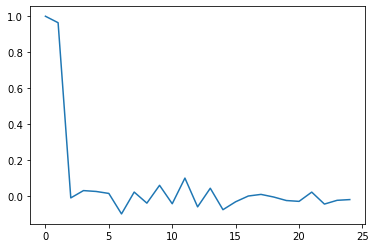

In [544]:
plt.plot(pacf_aapl)

In [ ]:
#Pacf plot of closed price time series shows a sharp cutoff.

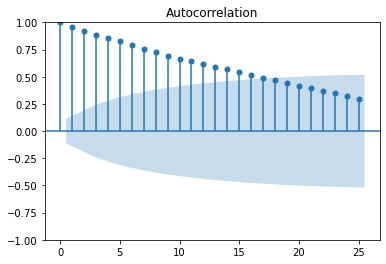

In [221]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(close_aapl)

plt.show()

/Users/xingyulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


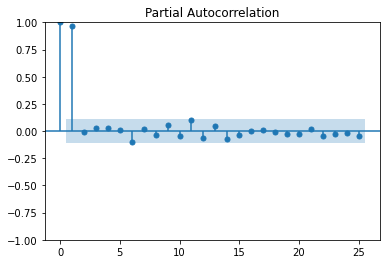

In [226]:
plot_pacf(close_aapl) 

plt.show()

In [ ]:
#13. Compute the auto-correlation function (ACF) of the return time series & plot

In [362]:
#return pacf & acf

In [ ]:
#Here I choose to use linear return for convenience. 

In [183]:
r_aapl = close_aapl[1:]/close_aapl[:-1].values - 1

[ 1.         -0.02186086 -0.08917166 -0.02799636 -0.01482845  0.0840374
 -0.01448748 -0.02551101 -0.07812503  0.07000609 -0.10811277  0.05069111
 -0.05570437  0.04278534  0.00302649 -0.04851131 -0.01796379 -0.0039516
  0.07165953  0.01933902  0.05212804  0.00119642 -0.05819966 -0.00301655]


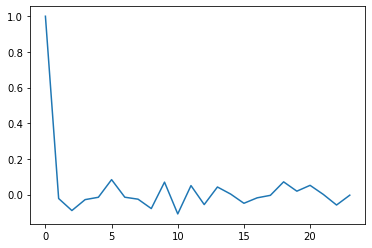

In [184]:
r_acf_aapl = statsmodels.tsa.stattools.acf(r_aapl)
print(r_acf_aapl)
plt.plot(r_acf_aapl)
plt.show()

In [ ]:
#Acf plot of linear return shows a sharp cutoff. The plot shows that it roughly cuts off at lag=1.

In [185]:
#15. Compute the partial auto-correlation function (PACF) of the return time series & plot

[ 1.         -0.02194866 -0.09041609 -0.03275571 -0.02499148  0.07995895
 -0.01528951 -0.01328225 -0.08164369  0.06907572 -0.13618914  0.06330145
 -0.08357786  0.07293309 -0.0355908  -0.01461992 -0.0509467   0.01833102
  0.02939703  0.05594024  0.03775129  0.05374867 -0.09206284  0.01671816]


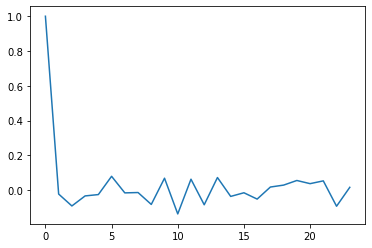

In [186]:
r_pacf_aapl = statsmodels.tsa.stattools.pacf(r_aapl)
print(r_pacf_aapl)
plt.plot(r_pacf_aapl)
plt.show()

In [ ]:
#Pacf plot of linear return shows a sharp cutoff. The plot shows that it roughly cuts off at lag=1 as well.

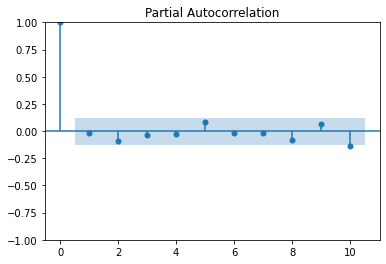

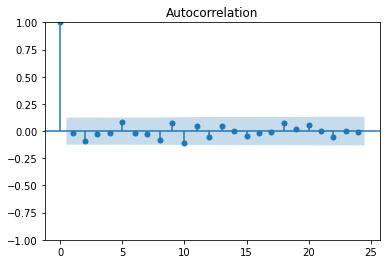

In [358]:
plot_pacf(r_aapl,lags=10) 
plot_acf(r_aapl) 
plt.show()

# ARMA models 

In [349]:
#17.Define mathematically an ARMA(p,q) model

The definition is: $y_t-\phi_1y_{t-1}-\phi_2y_{t-2}-...\phi_py_{t-p}=\epsilon_t+\theta_1\epsilon_{t-1}+\theta_q\epsilon_{t-q}$, where p=AR terms and q=MA terms. $\epsilon$ is the independent identically distributed white noise. It is a combination of Autoregressive model and moving average model.

In [132]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#18. Define a training and test set and fit an ARMA model to the price time series

In [545]:
X = close_aapl.values
train, test = X[0:len(X)-60], X[len(X)-60:]

In [546]:
from statsmodels.tsa.stattools import adfuller

In [547]:
#To fit an arma model, we first need the time series to be stationary. Here, Dickey-fuller test is used to test the stationarity. The null hypothesis for this test is： there exists a unit root.
# The p-value for the adf test on price time series is 0.24945957461065482, which is much bigger than 5% significance level. We can't reject the null hypothesis and thus the time series is not staionary.

In [548]:
print(statsmodels.tsa.stattools.adfuller(train))#since the p-value is much larger than 5%, the data is not stationary.

(-2.029036778972333, 0.2739883653246199, 0, 239, {'1%': -3.458010773719797, '5%': -2.8737103617125186, '10%': -2.5732559963936206}, 1173.5848239053494)


In [549]:
aapl_diff = aapl.diff()
aapl_diff = aapl_diff.dropna()

In [550]:
#diff = aapl_diff.values
train_diff, test_diff = aapl_diff[0:len(aapl_diff)-60], aapl_diff[len(aapl_diff)-60:]
#print(train_diff)

In [551]:
result_diff = adfuller(train_diff['Close'])
print(result_diff)
#To make it a stationary data, I differentiate the data once and do the adf test again. The p-value for this time is:7.029295080808902e-25, which is much smaller than 5% and thus, we can reject it.
#now the p-value is 4.98e-20, which is much smaller than 5%. So the data is stationary now.

(-14.465844957037602, 6.729262817716823e-27, 0, 209, {'1%': -3.4620315036789666, '5%': -2.8754705024827127, '10%': -2.5741950726860647}, 1021.0151401181902)


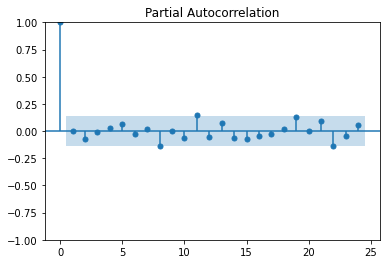

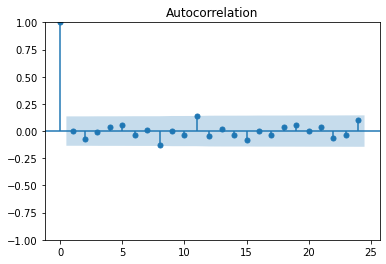

In [552]:
plot_pacf(train_diff['Close']) 
plot_acf(train_diff['Close']) 
plt.show()

In [297]:
!pip install pmdarima

     |████████████████████████████████| 608 kB 203 kB/s eta 0:00:01


In [553]:
#use aic rule to find the optimal model

import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=0, 
                              start_q=0,
                              trace=True)
    return autoarima_model

In [554]:
arima_model = arimamodel(train)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1244.400, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1246.400, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1246.400, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1242.402, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1248.170, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.441 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -620.201
Date:                Fri, 17 Feb 2023   AIC                           1242.402
Time:                        16:37:36   BIC                           1245.879
Sample:                             0   HQIC                          1243.803
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        10.5075      0.903     11.630      0.000       8.737      12.278
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.50
Prob(Q):                              1.00   Prob(JB):                         0.47
Heteroskedasticity (H):               1.08   Skew:                            -0.14
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#To find a more accurate lag, I used the auto_arima equation in python, 
#which can automatically help me pick the right lag in the data

In [555]:
# test p and q value
parameters = statsmodels.tsa.stattools.arma_order_select_ic(train_diff['Close'], max_ar=5, max_ma=5, ic=['aic', 'bic'])
print(parameters)

{'aic':              0            1            2            3            4  \
0  1108.631567  1110.629697  1111.682235  1113.680539  1115.379516   
1  1110.629954  1109.321661  1113.681460  1115.673548  1117.161479   
2  1111.622384  1113.608661  1104.455597  1105.109349  1111.508688   
3  1113.593911  1115.574973  1105.096946  1102.239003  1104.283949   
4  1115.377249  1117.144000  1107.064423  1104.259793  1109.543629   
5  1116.561003  1111.541045  1120.516331  1106.252763  1105.871215   

             5  
0  1116.445168  
1  1111.919001  
2  1113.904133  
3  1106.167453  
4  1106.431757  
5  1108.914076  , 'bic':              0            1            2            3            4  \
0  1115.325782  1120.671020  1125.070665  1130.416077  1135.462161   
1  1120.671277  1122.710091  1130.416997  1135.756193  1140.591232   
2  1125.010814  1130.344198  1124.538242  1128.539102  1138.285548   
3  1130.329449  1135.657618  1128.526699  1129.015863  1134.407917   
4  1135.459894  1140.573

In [556]:
model = ARIMA(train, order=(0,1,0))
model_fit = model.fit()

In [557]:
#19. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set

In [558]:
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.forecast(steps=len(test))
error = mean_squared_error(test,predictions)

predictions_train = model_fit.predict(start=0, end=239)
error_train = mean_squared_error(train,predictions_train)
print('Test MSE: %.3f' % error)
print('Train MSE: %.3f' % error_train)

Coefficients: [10.50751083]
Test MSE: 58.834
Train MSE: 102.583


In [528]:
predictions

array([146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939,
       146.3999939, 146.3999939, 146.3999939, 146.3999939, 146.3999939])

In [559]:
#second way to predict
start1=len(train)
end1=len(train)+len(test)-1
pred=model_fit.predict(start=start1, end=end1)
#pred

In [560]:
#20. Plot the price time series vs the ARMA forecast in the test set

(160.0, 170.0)

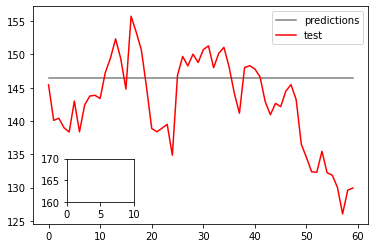

In [561]:
fig, ax = plt.subplots(1, 1)
plt.plot(predictions,color='grey',label='predictions')
#plt.plot(aapl['Close'].values,color='red')
plt.plot(test,color='red',label='test')
axins = ax.inset_axes((0.1, 0.1, 0.2, 0.2))
axins.plot(predictions,color='grey')
axins.plot(test,color='red')
plt.legend(loc='upper right')
zone_left = 0
zone_right = 10

x_ratio = 0.5  
y_ratio = 0.05

xlim0 = 0
xlim1 = 10

ylim0 = 160
ylim1 = 170

axins.set_xlim(xlim0, xlim1)
axins.set_ylim(ylim0, ylim1)


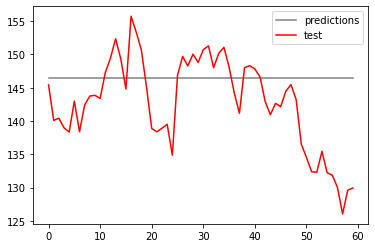

In [562]:
plt.plot(predictions,color='grey',label='predictions')
#plt.plot(aapl['Close'].values,color='red')
plt.plot(test,color='red',label='test')
plt.legend(loc='upper right')

In [563]:
#In general, the prediction obtained from the training set is a straight line, stable at around 167, but it is found carefully that the line fluctuates slightly at the beginning, as can be seen when the graph is enlarged.

In [564]:
#21. Fit an ARMA model to the return time series

In [565]:
X = linear_rets.values
train2, test2 = X[0:len(X)-60], X[len(X)-60:]
print(len(train2))

239


In [566]:
print(statsmodels.tsa.stattools.adfuller(train2))
#the return is stationary  becuase the p-value is around 1.5895889290027638e-12, which is smaller than 5%.
#For convenience, I have used linear return for the next analysis. First, in order to fit an arma model, we need the time series to be stable, and again, we use the ADF test and find its p- value
#is 1.5895889290027638e-12. The p-value is small enough to reject the null hypothesis and thus we can conclude the return is stationary and continue doing the following analysis.

(-15.328767517769844, 3.972059672836943e-28, 0, 238, {'1%': -3.458128284586202, '5%': -2.873761835239286, '10%': -2.5732834559706235}, -1083.8652746599384)


In [458]:
# test p and q value
parameters2 = statsmodels.tsa.stattools.arma_order_select_ic(train2, max_ar=5, max_ma=5, ic=['aic', 'bic'])
print(parameters2)

{'aic':              0            1            2            3            4  \
0 -1032.527433 -1030.529077 -1029.413892 -1027.420988 -1026.655318   
1 -1030.528946 -1028.530734 -1027.312156 -1025.464936 -1024.242255   
2 -1029.535572 -1027.514635 -1025.229369 -1024.896339 -1026.302110   
3 -1027.554032 -1025.554300 -1025.180178 -1022.328536 -1021.179880   
4 -1026.605067 -1024.609114 -1024.067819 -1020.869899 -1020.205937   
5 -1024.855274 -1022.855778 -1020.724266 -1019.031267 -1017.527755   

             5  
0 -1024.895282  
1 -1030.093661  
2 -1021.057909  
3 -1019.097507  
4 -1017.525084  
5 -1014.861329  , 'bic':              0            1            2            3            4  \
0 -1025.842764 -1020.502075 -1016.044555 -1010.709317 -1006.601313   
1 -1020.501944 -1015.161397 -1010.600485 -1005.410931 -1000.845916   
2 -1016.166235 -1010.802964 -1005.175363 -1001.500000  -999.563436   
3 -1010.842361 -1005.500294 -1001.783838  -995.589862  -991.098872   
4 -1006.551062 -1001.212

In [567]:
arima_model2 = arimamodel(train2)
arima_model2.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1174.204, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1172.205, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1172.205, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1176.192, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1170.243, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.224 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  239
Model:                        SARIMAX   Log Likelihood                 589.096
Date:                Fri, 17 Feb 2023   AIC                          -1176.192
Time:                        16:43:58   BIC                          -1172.716
Sample:                             0   HQIC                         -1174.791
                                - 239                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   3.64e-05     11.619      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.97   Prob(JB):                         0.48
Heteroskedasticity (H):               1.30   Skew:                            -0.14
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [568]:
model2 = ARIMA(train2, order=(0,0,0))
model_fit2 = model2.fit()

In [460]:
#22. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set

In [569]:
print('Lag: %s' % window)
print('Coefficients: %s' % model_fit2.params)
# make predictions
predictions2 = model_fit2.forecast(steps=len(test2))
error2 = mean_squared_error(test2,predictions2)
print('Test MSE: %.5f' % error2)

predictions_train2 = model_fit2.predict(start=0, end=238)
error_train2 = mean_squared_error(train2,predictions_train2)
print('Train MSE: %.5f' % error_train2)

Lag: 1
Coefficients: [0.00014218 0.00042303]
Test MSE: 0.00064
Train MSE: 0.00042


In [ ]:
#average of square of difference between the predicted values and true values.

In [419]:
predictions2

array([0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142129,
       0.00142129, 0.00142129, 0.00142129, 0.00142129, 0.00142

In [ ]:
#23. Plot the return time series vs the ARMA forecast in the test set

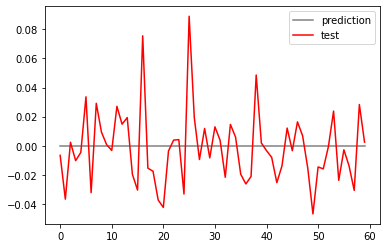

In [541]:
plt.plot(predictions2,color='grey',label='prediction')
plt.plot(test2,color='red',label='test')
plt.legend()

In [ ]:
#Here we can see that for white noise, the future is independent of both the present and the past, and the prediction of the future is actually the mean value of the present white noise distribution.

In [282]:
#24. Introduce mathematically a Gaussianity test

The Gaussianity test was used to check if the data follows normal distribution. It uses covariance of paris of different orders. Null hypothesis: data follows normal distribution. The statistics that evaluated in Gaussianity test is: 

$W = \frac{(\sum_{i}^{T} a_i *r_{(i)})^2} {\sum_{i}^{T} (r_{(i)} -\mu)^2}$

where $r_{(i)}$ is the i-th smallest value in the sample such that:
$a_i=\frac{m^T V^{-1}}{N}$

N is a normalization factor such that $\sum_{i} (a_i)^2 =1 $

m=vector of expected values of all order statistics in a Gaussian distribution

V=expected covariance of pairs of order statistics

After sorting the data, we calculate the statistics W and its p-value.


In [ ]:
#25. Perform a Gaussianity test of the return time series

In [342]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)

# generate univariate observations
# normality test
stat, p = shapiro(r_aapl)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.019
Sample does not look Gaussian (reject H0)


In [343]:
#26. Introduce mathematically a stationarity test

If the time series data is stationary, it means the data don't depend on time. It has two types of stationarity:

i) Strong stationarity:$(y_1,y_2,..y_n)=(y_{1+\tau},y_{2+\tau},...y_{n+\tau})$ in distribution.

ii) Weak stationarity: 

$E(y_t)=\mu$; 

$Var(y_t)=E[(y_t -\mu)^2]=\sigma^2$;

$Cov[y_t,y_{t-\tau}]=E[(y_t-\mu)(y_{t-\tau}-\mu)]=C(\tau)$

For strong stationary, it means any joint distribution of any moments never depends on time, it is a very strict condition. However, for weak stationary, it only has constant mean, constant variance and constant covariance, and other condition could change over time, which means it is less strict.

In [344]:
#27. Perform a stationarity test of the return time series

In [345]:
print(statsmodels.tsa.stattools.adfuller(r_aapl))

(-12.284898889484266, 8.067268898811943e-23, 1, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, -1093.8422914280509)


In [ ]:
#since the p-value is much smaller than 5%, then we can reject it and thus the data is stationary.